In [1]:
import pandas as pd

In [2]:
df_tratado = pd.read_csv('fake_news_fakebrcorpus.csv', sep=';', encoding='utf-8')

In [3]:
df_tratado.head(3)

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0


In [4]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 19 columns):
seq                                               7200 non-null int64
texto normalizado                                 7200 non-null object
author                                            7200 non-null object
link                                              7200 non-null object
category                                          7200 non-null object
number of tokens                                  7200 non-null int64
number of types                                   7200 non-null int64
number of links inside the news                   7200 non-null object
number of verbs                                   7200 non-null int64
number of subjuntive and imperative verbs         7200 non-null int64
number of nouns                                   7200 non-null int64
number of adjectives                              7200 non-null int64
number of adverbs                               

In [5]:
features_names = df_tratado.columns

In [6]:
features_names_filtrado = [feature_n for feature_n in features_names if feature_n not in ['seq','fake','number of types']]

In [7]:
df_tratado_filtrado = df_tratado[features_names_filtrado]

In [8]:
df_tratado_filtrado.describe()

,number of tokens,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity
count,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,742.763333,100.76750,4.063194,182.920278,33.154444,30.014444,13.869028,38.758056,0.003065,0.209758,6.472975
std,774.155454,108.03151,5.492677,186.507322,39.702327,37.742105,15.303212,51.759915,0.007780,0.070239,62.426813
min,11.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232210
25%,183.000000,26.00000,1.000000,46.000000,7.000000,7.000000,3.000000,8.000000,0.000000,0.162500,0.471261
50%,416.000000,57.00000,2.000000,106.000000,18.000000,15.000000,8.000000,19.000000,0.000579,0.204082,0.578047
75%,1064.250000,141.00000,5.000000,265.000000,45.000000,39.000000,19.000000,49.000000,0.003799,0.251055,0.678938
max,8634.000000,1148.00000,65.000000,2170.000000,532.000000,497.000000,181.000000,720.000000,0.382353,0.750000,875.000000


In [9]:
df_politica = df_tratado.loc[df_tratado["category"]=='politica\r\n']

In [10]:
df_politica.describe()

,seq,number of tokens,number of types,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
count,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.00000
mean,3533.562201,715.310766,295.692105,95.126316,3.918182,179.705263,30.198086,27.472249,13.476077,34.920574,0.002428,0.198567,7.164690,0.50000
std,2041.930893,731.923434,244.351872,99.855082,5.063323,179.457012,35.827249,33.879436,14.795945,45.502127,0.004800,0.067288,65.424432,0.50006
min,1.000000,11.000000,9.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232210,0.00000
25%,1806.750000,181.000000,105.000000,26.000000,1.000000,46.000000,7.000000,7.000000,4.000000,8.000000,0.000000,0.154969,0.469166,0.00000
50%,3599.500000,404.500000,201.500000,55.000000,2.000000,104.500000,16.000000,14.000000,8.000000,18.000000,0.000000,0.192684,0.575497,0.50000
75%,5406.250000,1026.000000,426.000000,133.000000,5.000000,261.000000,41.000000,36.000000,19.000000,45.000000,0.003069,0.235736,0.676259,1.00000
max,7198.000000,8634.000000,2680.000000,1053.000000,65.000000,2170.000000,443.000000,497.000000,181.000000,531.000000,0.083333,0.750000,792.000000,1.00000


In [11]:
df_tratado_fake = df_tratado.loc[df_tratado["fake"]==1]

In [12]:
df_tratado_real = df_tratado.loc[df_tratado["fake"]==0]

In [13]:
df_politica_fake = df_politica.loc[df_politica["fake"]==1]

In [14]:
df_politica_real = df_politica.loc[df_politica["fake"]==0]

In [15]:
df_politica_real.describe()

,seq,number of tokens,number of types,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.0
mean,1733.562201,1215.333493,473.018660,159.697129,6.465550,305.145455,51.783254,46.477990,22.460766,59.384211,0.002021,0.201737,2.256917,0.0
std,963.809501,740.331403,229.594248,105.136960,5.910859,177.968962,39.631952,38.598022,16.067225,52.912866,0.003246,0.056404,28.937690,0.0
min,1.000000,131.000000,76.000000,12.000000,0.000000,35.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.036074,0.232210,0.0
25%,947.500000,714.250000,315.000000,91.000000,2.000000,185.250000,26.000000,22.000000,12.000000,26.000000,0.000000,0.163180,0.429608,0.0
50%,1806.500000,1020.500000,424.500000,132.000000,5.000000,260.000000,40.000000,35.000000,19.000000,44.000000,0.001144,0.194762,0.470335,0.0
75%,2472.750000,1575.000000,592.000000,203.000000,9.000000,388.000000,67.000000,60.000000,29.000000,76.000000,0.002600,0.231836,0.516603,0.0
max,3598.000000,8634.000000,2680.000000,1053.000000,65.000000,2170.000000,443.000000,497.000000,181.000000,531.000000,0.038571,0.590258,565.000000,0.0


In [16]:
df_politica_fake.describe()

,seq,number of tokens,number of types,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.0
mean,5333.562201,215.288038,118.365550,30.555502,1.370813,54.265072,8.612919,8.466507,4.491388,10.456938,0.002834,0.195397,12.072463,1.0
std,963.809501,152.659291,61.735072,23.458386,1.834150,35.588690,8.051172,9.142878,4.273464,12.024760,0.005935,0.076525,87.619496,0.0
min,3601.000000,11.000000,9.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.351338,1.0
25%,4547.500000,136.000000,82.000000,19.000000,0.000000,34.000000,4.000000,4.000000,2.000000,5.000000,0.000000,0.142857,0.627179,1.0
50%,5406.500000,183.000000,106.000000,26.000000,1.000000,46.000000,7.000000,7.000000,4.000000,8.000000,0.000000,0.189655,0.674987,1.0
75%,6072.750000,252.000000,139.000000,36.000000,2.000000,65.000000,10.000000,10.000000,6.000000,13.000000,0.004292,0.239130,0.722674,1.0
max,7198.000000,2625.000000,875.000000,426.000000,28.000000,537.000000,140.000000,183.000000,72.000000,203.000000,0.083333,0.750000,792.000000,1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


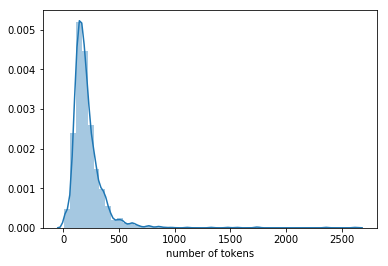

In [16]:
import seaborn as sns
%matplotlib inline

sns.distplot(df_politica_fake['number of tokens'])

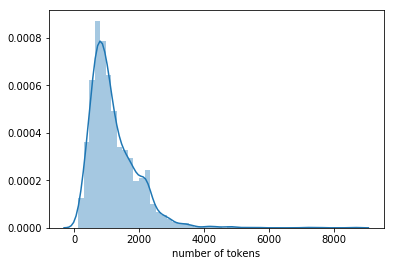

In [13]:
sns.distplot(df_politica_real['number of tokens'])

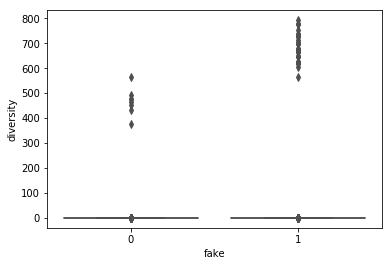

In [14]:
#sns.distplot(df_politica_real['diversity'])
sns.boxplot(x="fake", y="diversity", data=df_politica,palette='rainbow')

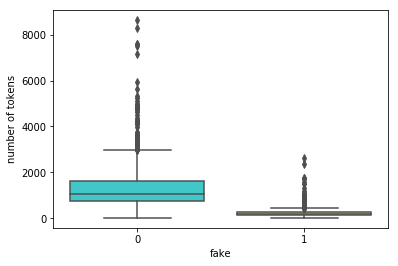

In [20]:
sns.boxplot(x="fake", y="number of tokens", data=df_tratado,palette='rainbow')

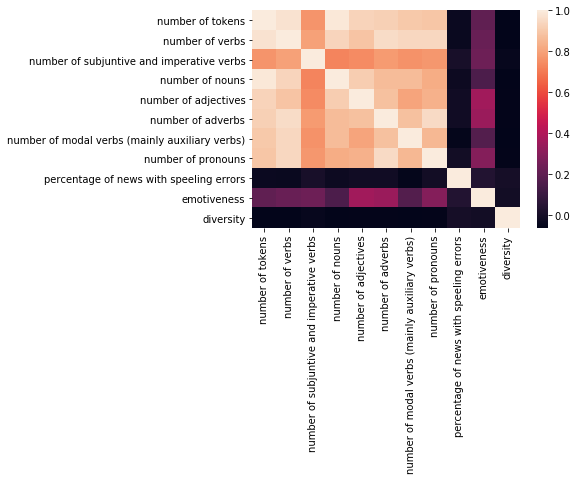

In [21]:
sns.heatmap(df_tratado_filtrado.corr())

In [17]:
df_pol_filtrado = df_politica[['number of tokens','diversity','emotiveness']]

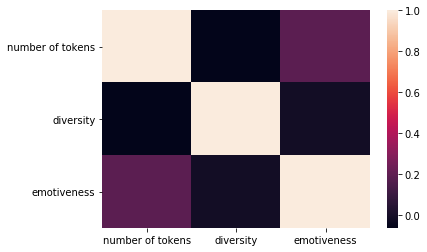

In [18]:
sns.heatmap(df_pol_filtrado.corr())

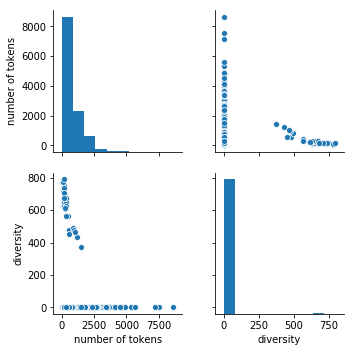

In [19]:
sns.pairplot(df_politica[['number of tokens','diversity']])

In [20]:
df_politica.tail()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
7189,7190,Caiu a máscara do Prof. Villa da Jovem Pan. Ví...,None\r\n,https://afolhabrasil.com.br/politica/caiu-masc...,politica\r\n,96,63,0\r\n,11,0,27,1,1,1,2,0.0,0.052632,0.741176,1
7192,7193,"Deputado e senador pedem para ""abrir mão"" do f...",None\r\n,https://www.diariodobrasil.org/deputado-e-sena...,politica\r\n,187,109,0\r\n,25,0,47,11,5,1,8,0.0,0.222222,0.712418,1
7195,7196,"FT: ""O julgamento de um populista que usou din...",None\r\n,https://www.diariodobrasil.org/ft-o-julgamento...,politica\r\n,185,101,0\r\n,27,0,46,9,4,4,10,0.0,0.178082,0.619632,1
7196,7197,Nota fiscal emitida pela Petrobras mostra que ...,None\r\n,https://www.diariodobrasil.org/nota-fiscal-emi...,politica\r\n,148,86,1\r\n,19,0,38,9,2,4,2,0.0,0.192982,0.651515,1
7197,7198,"Estão estancando a sangria da ""Lava-Jato"" bem ...",None\r\n,https://www.diariodobrasil.org/estao-estancand...,politica\r\n,313,181,0\r\n,43,2,76,14,8,6,17,0.0,0.184874,0.665441,1


In [21]:
df_politica.shape

(4180, 19)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
import numpy as np

#normalizes attributes frequencies
def normalizeData(data):
	rows_sum = np.sum(data, axis=1)
	data = (data.T / rows_sum).T
	return data

In [20]:
#removes attributes with frequency under min_freq on the dataset
def removeMinFreq(data, labels, min_freq = 1):
    # counting no. of ocurrences per word
    cols_sum = np.sum(data, axis=0)

    #creating an array with indexes of columns that must be deleted 
    del_indexes = []
    #for each val[i] in the cols_sum
    for i, val in zip(range(len(cols_sum)), cols_sum):
        #if that val is smaller than the minimun freq. insert i into the array
        if val < min_freq:
            del_indexes.append(i)

    #deleting columns with minimum frequency smaller than x
    #calls np.delete on the array, asking it to delete all columns with indexes given by del_indexes
    data = np.delete(data,del_indexes,1) 
    labels = np.delete(labels,del_indexes,0)
    return (data, labels)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

class CountVectorizerPlus(CountVectorizer):
    def __init__(self, *args, fit_add=None, **kwargs):
        #this will store a reference to an extra data to include for fitting only
        self.fit_add = fit_add
        super().__init__(*args, **kwargs)
    
    def transform(self, X):
        U = super().transform(X)
        return U
    
    def fit_transform(self, X, y=None):
        if self.fit_add is not None:
            X_new = pd.concat([X, self.fit_add])
        else:
            X_new = X
        #calling CountVectorizer.fit_transform()
        super().fit_transform(X_new, y)

        U = self.transform(X)
        return U
    

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [23]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

def classificar_texto(pipe, X_treino, y_treino,isXGB):
    
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state = 42)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
    
        y_pred = []
        predictions = []
    
        if(isXGB == 1):
            pipe.fit(treino_kf, classe_treino_kf)
            y_pred = pipe.predict(teste_kf)
            predictions = [round(value) for value in y_pred]
        else: 
            pipe.fit(treino_kf, classe_treino_kf)
            predictions = pipe.predict(teste_kf)
        
        for predict in predictions:
            all_predictions.append(predict)
            
        for clas_teste in classe_teste_kf:
            all_classes_tests.append(clas_teste)

    # evaluate predictions
    print ("Accuracy:", accuracy_score(all_classes_tests, all_predictions))
    print ("Precision:", precision_score(all_classes_tests, all_predictions))
    print (classification_report(all_classes_tests, all_predictions))
    print (confusion_matrix(all_classes_tests, all_predictions))
    
    

In [24]:
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):

    token_espaco = tokenize.WhitespaceTokenizer()
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()    

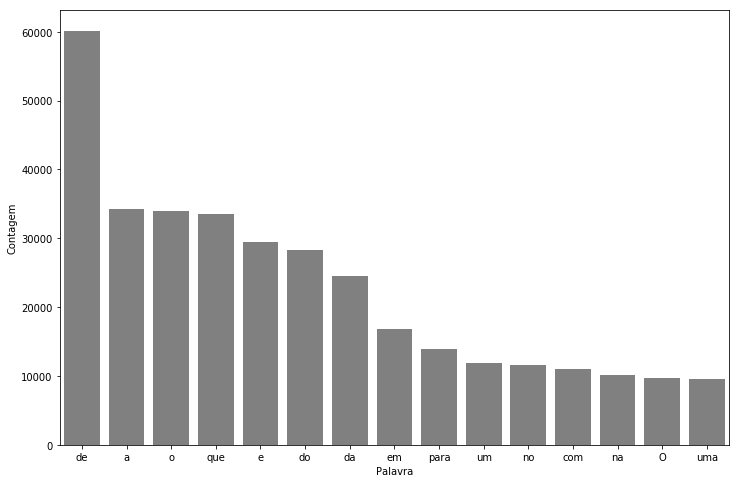

In [27]:
pareto(df_tratado, "texto normalizado", 15)

In [25]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [26]:
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
import unidecode
import re


def limpeza(texto,coluna):
    stop_words_pt = nltk.corpus.stopwords.words("portuguese")
    stemmer = SnowballStemmer("portuguese")
    #stemmer = nltk.RSLPStemmer()
    
    
    token = tokenize.WordPunctTokenizer()

    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stop_words_pt
    stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

    #Transformando para minusculo, removendo stop words e pontuacao e realizando stemetização    
    
    frase_processada = list()
    for frase in texto[coluna]:
        nova_frase = list()
        ## Tokenizar
        palavras_texto = token.tokenize(frase.lower())
        for palavra in palavras_texto:
            ## Retirar números
            palavra_sem_numero = re.sub('[0-9]', '' , palavra)
            ## Retirar acentuação
            palavra_sem_acento = unidecode.unidecode(palavra_sem_numero)
            ## Retirar stop words
            if ((len(palavra_sem_acento) > 0) and (palavra_sem_acento not in stopwords_sem_acento) and palavra_sem_acento.isalpha()):
                ## Stemização - Obtenção do radical
                palavra_stem = stemmer.stem(palavra_sem_acento)
                ## Retirar as palavras com apenas 1 caracter
                if(len(palavra_stem) > 1):
                    nova_frase.append(palavra_stem)
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

In [27]:
import string
def limpeza2(texto,coluna):
    with open('var/stopwords.txt') as f:
        cachedStopWords = f.read()
        stemmer = nltk.stem.SnowballStemmer('portuguese')
        translator = str.maketrans({key:' ' for key in string.punctuation})
    frase_processada = list()
    for frase in texto[coluna]:
        result = ''
        ## Retirar pontuação, os números e transformar em minúscula
        result = re.sub('[0-9]', '' , frase.translate(translator)).lower()
        ## Retirar os stop words e realiza stemização ou obteção do radical
        result = ' '.join([stemmer.stem(word) for word in result.split() if word not in cachedStopWords])
        frase_processada.append(''.join(result))
    return frase_processada

In [34]:
df_politica['texto preprocessado2'] = limpeza2(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_tratado['texto preprocessado2'] = limpeza2(df_tratado,"texto normalizado")

In [36]:
df_tratado.head()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0,pod decid expuls deput federal carl gaguim par...
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0,bolsonar é liberal complet diz president psl p...
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0,ministr stf lib andre nev prisã domicili decis...
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0,apes abund cresc preocup preserv font uso raci...
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0,harvard mit lev dilm mor suplicy eua megaconfe...


In [37]:
df_tratado['words'] = df_tratado['texto normalizado'].apply(lambda x: len(x.split(' ')))

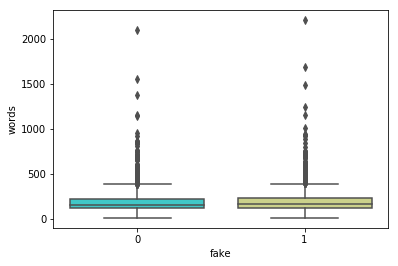

In [38]:
sns.boxplot(x="fake", y="words", data=df_tratado,palette='rainbow')

In [39]:
df_tratado['length'] = df_tratado['texto normalizado'].apply(lambda x: len(x))

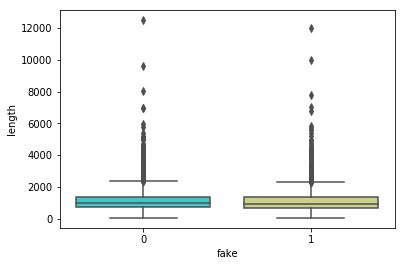

In [40]:
sns.boxplot(x="fake", y="length", data=df_tratado,palette='rainbow')

In [41]:
df_tratado['length2'] = df_tratado['texto preprocessado2'].apply(lambda x: len(x))

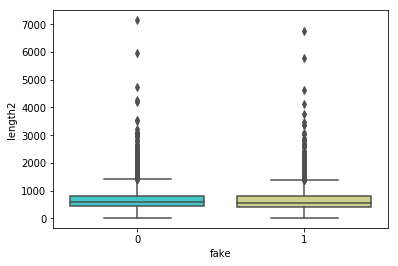

In [42]:
sns.boxplot(x="fake", y="length2", data=df_tratado,palette='rainbow')

In [43]:
df_politica.head()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0,pod decid expuls deput federal carl gaguim par...
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0,bolsonar é liberal complet diz president psl p...
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0,ministr stf lib andre nev prisã domicili decis...
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0,apes abund cresc preocup preserv font uso raci...
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0,harvard mit lev dilm mor suplicy eua megaconfe...


In [44]:
df_politica.tail()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
7189,7190,Caiu a máscara do Prof. Villa da Jovem Pan. Ví...,None\r\n,https://afolhabrasil.com.br/politica/caiu-masc...,politica\r\n,96,63,0\r\n,11,0,27,1,1,1,2,0.0,0.052632,0.741176,1,caiu másc prof vill jov pan víd mostr professo...
7192,7193,"Deputado e senador pedem para ""abrir mão"" do f...",None\r\n,https://www.diariodobrasil.org/deputado-e-sena...,politica\r\n,187,109,0\r\n,25,0,47,11,5,1,8,0.0,0.222222,0.712418,1,deput senador ped abrir mã for privilegi sã ig...
7195,7196,"FT: ""O julgamento de um populista que usou din...",None\r\n,https://www.diariodobrasil.org/ft-o-julgamento...,politica\r\n,185,101,0\r\n,27,0,46,9,4,4,10,0.0,0.178082,0.619632,1,ft julgament popul usou dinheir públic ajud af...
7196,7197,Nota fiscal emitida pela Petrobras mostra que ...,None\r\n,https://www.diariodobrasil.org/nota-fiscal-emi...,politica\r\n,148,86,1\r\n,19,0,38,9,2,4,2,0.0,0.192982,0.651515,1,not fiscal emit petrobr mostr gasolin é vend b...
7197,7198,"Estão estancando a sangria da ""Lava-Jato"" bem ...",None\r\n,https://www.diariodobrasil.org/estao-estancand...,politica\r\n,313,181,0\r\n,43,2,76,14,8,6,17,0.0,0.184874,0.665441,1,estã estanc sangr lav jat bem debaix nariz lem...


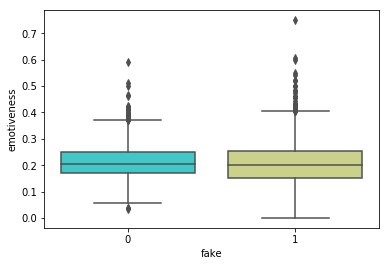

In [45]:
sns.boxplot(x="fake", y="emotiveness", data=df_tratado,palette='rainbow')

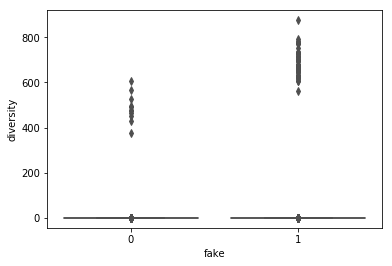

In [46]:
sns.boxplot(x="fake", y="diversity", data=df_tratado,palette='rainbow')

In [47]:
df_politica['number of tokens'] = df_politica['number of tokens'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_tratado['number of tokens'] = df_tratado['number of tokens'].astype('float')

In [49]:
df_politica['percentage of news with speeling errors'] = df_politica['percentage of news with speeling errors'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_politica['emotiveness'] = df_politica['emotiveness'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_politica['diversity'] = df_politica['diversity'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_politica

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake,texto preprocessado2
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168.0,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0,pod decid expuls deput federal carl gaguim par...
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028.0,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0,bolsonar é liberal complet diz president psl p...
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540.0,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0,ministr stf lib andre nev prisã domicili decis...
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634.0,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0,apes abund cresc preocup preserv font uso raci...
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955.0,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0,harvard mit lev dilm mor suplicy eua megaconfe...
7,8,As 6 eleições presidenciais que podem mudar ra...,Por BBC \r\n,https://g1.globo.com/politica/noticia/as-6-ele...,politica\r\n,1905.0,742,0\r\n,195,6,479,102,81,31,105,0.002363,0.271513,0.438275,0,eleiçõ presidenc pod mud radical map polít amé...
8,9,Equipamento de Proteção Individual (EPI) x apo...,Por G1 Ribeirão e Franca \r\n,https://g1.globo.com/sp/ribeirao-preto-franca/...,politica\r\n,637.0,256,0\r\n,101,6,139,36,45,11,47,0.000000,0.337500,0.449912,0,equip proteçã individual epi x aposentador esp...
9,10,"Em decisão unânime, tribunal condena Lula em s...","Por Renan Ramalho e Filipe Matoso, G1, Brasíl...",https://g1.globo.com/politica/noticia/julgamen...,politica\r\n,2960.0,945,0\r\n,386,13,774,113,111,52,113,0.000387,0.193103,0.365712,0,decisã unânim tribunal conden lul segund instâ...
11,12,"Quarta-feira, 8 de fevereiro de 2017. Boa noit...",Por G1 \r\n,https://g1.globo.com/resumo-do-dia/noticia/qua...,politica\r\n,683.0,360,None\r\n,85,3,189,28,20,10,28,0.008197,0.175182,0.590164,0,quart feir fevereir boa noit estã princip notí...
13,14,CPI aprova relatório final e recomenda investi...,Jornal Hoje\r\n,https://g1.globo.com/politica/noticia/relatori...,politica\r\n,371.0,193,None\r\n,45,0,104,10,16,3,10,0.018237,0.174497,0.586626,0,cpi aprov relatóri final recomend investig rod...


In [53]:
df_politica['texto preprocessado'] = limpeza(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_politica['texto preprocessado'].head()

0    pod decid expuls deput federal carl gaguim par...
1    bolsonar liberal complet diz president psl par...
2    ministr stf lib andre nev prisa domicili decis...
3    apes abundanc cresc preocupaca preservaca font...
4    harvard mit levara dilm mor suplicy eua megaco...
Name: texto preprocessado, dtype: object

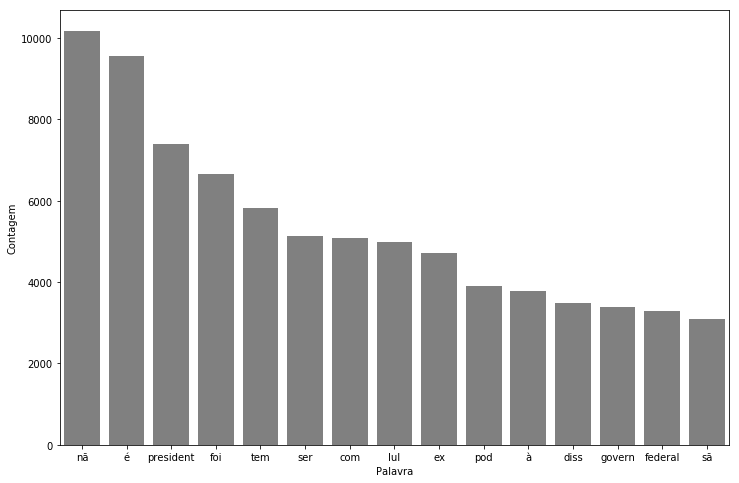

In [32]:
pareto(df_tratado, "texto preprocessado2", 15)

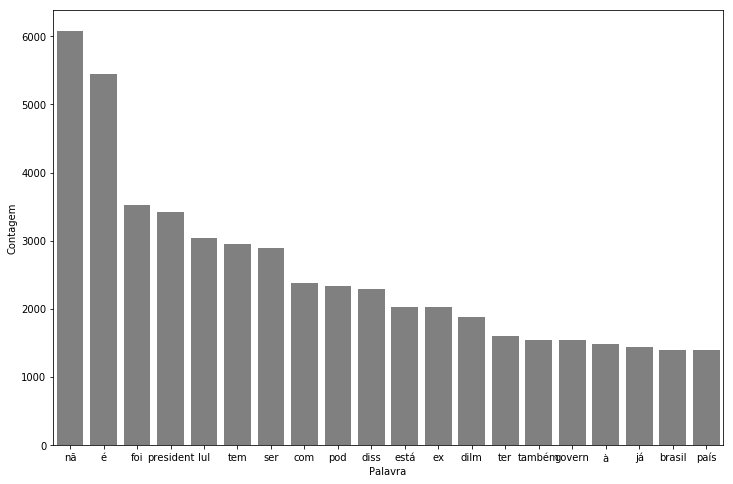

In [37]:
pareto(df_tratado_fake, "texto preprocessado2", 20)

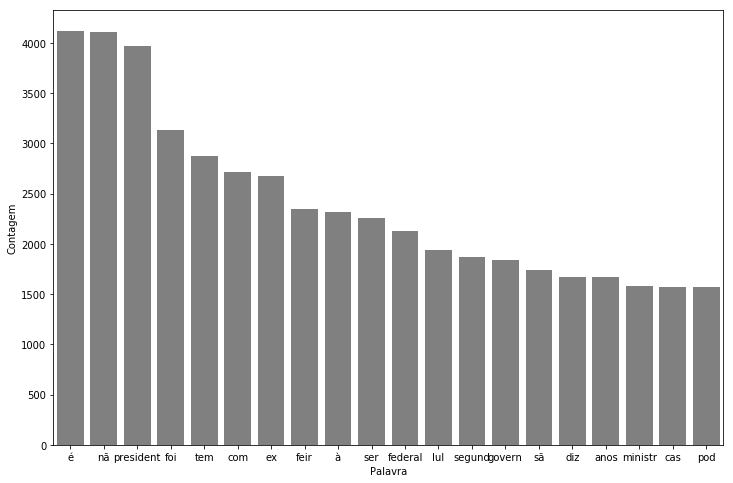

In [38]:
pareto(df_tratado_real, "texto preprocessado2", 20)

In [56]:
countV = CountVectorizer(lowercase=False, max_features=1000)
tfidfV = TfidfVectorizer(lowercase=False, max_features=1000)

In [57]:
features= [c for c in df_politica.columns.values if c  in ['texto preprocessado2','number of tokens','percentage of news with speeling errors','emotiveness','diversity']]

In [58]:
features

['number of tokens',
 'percentage of news with speeling errors',
 'emotiveness',
 'diversity',
 'texto preprocessado2']

In [29]:
features= [c for c in df_tratado.columns.values if c  in ['texto preprocessado2','emotiveness','diversity']]

In [60]:
treino, teste, classe_treino, classe_teste = train_test_split(df_politica['texto preprocessado2'],
                                                              df_politica['fake'],
                                                              test_size=0.20,rat
                                                              random_state = 42,shuffle = True, stratify = df_politica['fake'])

SyntaxError: invalid syntax (<ipython-input-60-c3c5ae121799>, line 4)

In [29]:
treino, teste, classe_treino, classe_teste = train_test_split(df_tratado['texto preprocessado2'],
                                                              df_tratado['fake'],
                                                              test_size=0.20,
                                                              random_state = 42,shuffle = True, stratify = df_tratado['fake'])

In [31]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0)


pipe = Pipeline([
#    ('cv', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('classificador', svc),
    ])

#pipe = Pipeline([
#    ('cv', CountVectorizerPlus(fit_add=teste)),
#    ('tfidf', TfidfTransformer()),
#    ('classificador', svc),
#    ])


classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9039930555555555
Precision: 0.9063918966119455
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2880
           1       0.91      0.90      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2612  268]
 [ 285 2595]]


In [32]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0)


pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', svc),
    ])

#pipe = Pipeline([
#    ('cv', CountVectorizerPlus(fit_add=teste)),
#    ('tfidf', TfidfTransformer()),
#    ('classificador', svc),
#    ])


classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9039930555555555
Precision: 0.9063918966119455
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2880
           1       0.91      0.90      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2612  268]
 [ 285 2595]]


In [ ]:
treino, teste, classe_treino, classe_teste = train_test_split(df_politica[features],
                                                              df_politica['fake'],
                                                              test_size=0.20,
                                                              random_state = 42,shuffle = True, stratify = df_politica['fake'])


In [30]:
treino, teste, classe_treino, classe_teste = train_test_split(df_tratado[features],
                                                              df_tratado['fake'],
                                                              test_size=0.20,
                                                              random_state = 42,shuffle = True, stratify = df_tratado['fake'])


In [31]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
tokens_pipe =  Pipeline([
                ('selector', NumberSelector(key='number of tokens')),
                ('standard', MinMaxScaler())
            ])

In [ ]:
speeling_errors_pipe =  Pipeline([
                ('selector', NumberSelector(key='percentage of news with speeling errors')),
                ('standard', MinMaxScaler())
            ])

In [34]:
emotiveness_pipe =  Pipeline([
                ('selector', NumberSelector(key='emotiveness')),
                ('standard', MinMaxScaler())
            ])

In [ ]:
diversity_pipe =  Pipeline([
                ('selector', NumberSelector(key='diversity')),
                ('standard', MinMaxScaler())
            ])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
words_pipe =  Pipeline([
                ('selector', NumberSelector(key='words')),
                ('standard', MinMaxScaler())
            ])

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
length_pipe =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', MinMaxScaler())
            ])

In [76]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('text', text_pipe), 
                   #   ('words', words_pipe),
                   #   ('length', length_pipe),
                     ])

In [35]:
from sklearn.pipeline import FeatureUnion
feats = FeatureUnion([('text', text_pipe),
                     # ('diversity', diversity_pipe),
                     # ('emotiveness', emotiveness_pipe)
                     ])

In [77]:
regressao_logistica = LogisticRegression(solver = "lbfgs")

In [36]:
feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

NameError: name 'regressao_logistica' is not defined

Conjunto de dados com todas as categorias e o pipeline incluindo texto e emotiviness

In [79]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8925347222222222
Precision: 0.8878216123499142
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2880
           1       0.89      0.90      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2553  327]
 [ 292 2588]]


Conjunto de dados com todas as categorias e o pipeline incluindo texto

In [63]:
feats = FeatureUnion([('text', text_pipe),
                     # ('diversity', diversity_pipe),
                     #('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

In [64]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8942708333333333
Precision: 0.8955067920585162
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2880
           1       0.90      0.89      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2580  300]
 [ 309 2571]]


Conjunto de dados com a categoria de politica

In [120]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.895933014354067
Precision: 0.900241837968561
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1672
           1       0.90      0.89      0.90      1672

   micro avg       0.90      0.90      0.90      3344
   macro avg       0.90      0.90      0.90      3344
weighted avg       0.90      0.90      0.90      3344

[[1507  165]
 [ 183 1489]]


In [86]:
predictions = pipe.predict(teste)

In [87]:
print ("Accuracy:", accuracy_score(classe_teste, predictions))
print ("Precision:", precision_score(classe_teste, predictions))
print (classification_report(classe_teste, predictions))
print (confusion_matrix(classe_teste, predictions))

Accuracy: 0.8819444444444444
Precision: 0.8840782122905028
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       720
           1       0.88      0.88      0.88       720

   micro avg       0.88      0.88      0.88      1440
   macro avg       0.88      0.88      0.88      1440
weighted avg       0.88      0.88      0.88      1440

[[637  83]
 [ 87 633]]


In [98]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier(random_state=0,learning_rate = 0.1,max_depth=5,n_estimators=300)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', gb),
    ])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8712918660287081
Precision: 0.8619402985074627
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2090
           1       0.86      0.88      0.87      2090

   micro avg       0.87      0.87      0.87      4180
   macro avg       0.87      0.87      0.87      4180
weighted avg       0.87      0.87      0.87      4180

[[1794  296]
 [ 242 1848]]


In [80]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier(random_state=0,learning_rate = 0.1,max_depth=5,n_estimators=300)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', gb),
    ])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8720095693779905
Precision: 0.8686581318160266
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2090
           1       0.87      0.88      0.87      2090

   micro avg       0.87      0.87      0.87      4180
   macro avg       0.87      0.87      0.87      4180
weighted avg       0.87      0.87      0.87      4180

[[1813  277]
 [ 258 1832]]


In [84]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.1)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', xbc),
    ])

classificar_texto(pipe,treino, classe_treino,1)


Accuracy: 0.8782296650717704
Precision: 0.8816996619990343
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2090
           1       0.88      0.87      0.88      2090

   micro avg       0.88      0.88      0.88      4180
   macro avg       0.88      0.88      0.88      4180
weighted avg       0.88      0.88      0.88      4180

[[1845  245]
 [ 264 1826]]


In [120]:
predictions = pipe.predict(teste)

In [121]:
print ("Accuracy:", accuracy_score(classe_teste, predictions))
print ("Precision:", precision_score(classe_teste, predictions))
print (classification_report(classe_teste, predictions))
print (confusion_matrix(classe_teste, predictions))

Accuracy: 0.888755980861244
Precision: 0.8973105134474327
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       418
           1       0.90      0.88      0.89       418

   micro avg       0.89      0.89      0.89       836
   macro avg       0.89      0.89      0.89       836
weighted avg       0.89      0.89      0.89       836

[[376  42]
 [ 51 367]]


In [127]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'classificador__C':[0.01,1,10,100,1000],
                   'classificador__tol':[0.0001,0.001,0.01],
                   'classificador__loss':['hinge','squared_hinge']                  }
clf = GridSearchCV(pipe, hyperparameters, cv=5)

clf.fit(treino,classe_treino)

print(clf.best_params_)

{'classificador__C': 1, 'classificador__loss': 'squared_hinge', 'classificador__tol': 0.0001}


In [128]:
clf.refit

preds = clf.predict(teste)

In [168]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.8744019138755981
Precision: 0.8883374689826302
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       418
           1       0.89      0.86      0.87       418

   micro avg       0.87      0.87      0.87       836
   macro avg       0.87      0.87      0.87       836
weighted avg       0.87      0.87      0.87       836

[[373  45]
 [ 60 358]]


In [38]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0,loss='squared_hinge',max_iter=5000)

In [39]:
feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])

Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto e emotiviness

In [40]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9112847222222222
Precision: 0.9097198201314424
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2880
           1       0.91      0.91      0.91      2880

   micro avg       0.91      0.91      0.91      5760
   macro avg       0.91      0.91      0.91      5760
weighted avg       0.91      0.91      0.91      5760

[[2619  261]
 [ 250 2630]]


In [90]:
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [79]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
#    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([ top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[top_coefficients],rotation=60)
    plt.show()

In [47]:
cv = text_pipe.get_params()['cv']
print(len(cv.vocabulary_))

320866


In [89]:
features = cv.get_feature_names()
print(cv.get_feature_names()[-20:])

['úte', 'úte entã', 'úte minut', 'úte protocol', 'úte volt', 'úte às', 'úter', 'úter artificial', 'úter cânc', 'úter homens', 'úter permit', 'úter próstat', 'útil', 'útil agrad', 'útil ano', 'útil brasil', 'útil país', 'útil produt', 'útil promotor', 'útil tenh']


In [52]:
features.append('emotiveness')

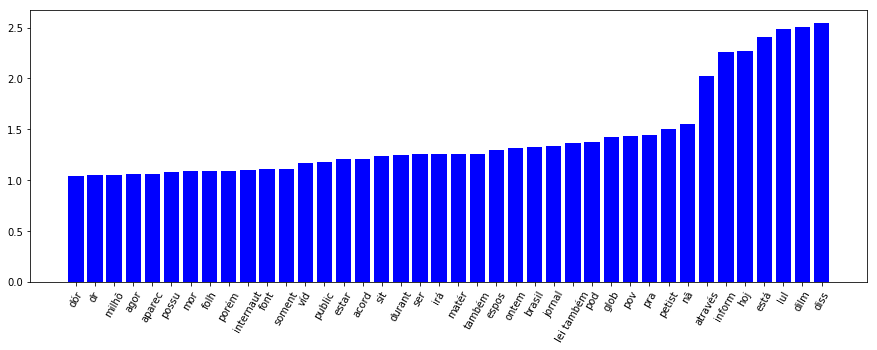

In [88]:
plot_coefficients(svc, features,40)

Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto

In [68]:
feats = FeatureUnion([('text', text_pipe),
                     # ('diversity', diversity_pipe),
                     #('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])

In [69]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9039930555555555
Precision: 0.9063918966119455
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2880
           1       0.91      0.90      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2612  268]
 [ 285 2595]]


Conjunto de dados com a categoria de politica

In [123]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8923444976076556
Precision: 0.8975757575757576
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1672
           1       0.90      0.89      0.89      1672

   micro avg       0.89      0.89      0.89      3344
   macro avg       0.89      0.89      0.89      3344
weighted avg       0.89      0.89      0.89      3344

[[1503  169]
 [ 191 1481]]


In [92]:
preds = pipe.predict(teste)

In [93]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.9027777777777778
Precision: 0.9027777777777778
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       720
           1       0.90      0.90      0.90       720

   micro avg       0.90      0.90      0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

[[650  70]
 [ 70 650]]


Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto e emotiveness

In [133]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.1,subsample= 0.5)

feats = FeatureUnion([('text', text_pipe),
                     # ('diversity', diversity_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc)
])


In [134]:
classificar_texto(pipe,treino,classe_treino,1)

Accuracy: 0.8911458333333333
Precision: 0.8888505350362443
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2880
           1       0.89      0.89      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2558  322]
 [ 305 2575]]


Conjunto de dados com todas as categorias de noticias r pipeline incluindo texto

In [70]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.1,subsample= 0.5)

feats = FeatureUnion([('text', text_pipe),
                     # ('diversity', diversity_pipe),
                     #('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc)
])


In [71]:
classificar_texto(pipe,treino,classe_treino,1)

Accuracy: 0.8840277777777777
Precision: 0.8829639889196675
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2880
           1       0.88      0.89      0.88      2880

   micro avg       0.88      0.88      0.88      5760
   macro avg       0.88      0.88      0.88      5760
weighted avg       0.88      0.88      0.88      5760

[[2542  338]
 [ 330 2550]]


In [115]:
preds = pipe.predict(teste)

In [116]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.9638888888888889
Precision: 0.9651810584958217
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       720
           1       0.97      0.96      0.96       720

   micro avg       0.96      0.96      0.96      1440
   macro avg       0.96      0.96      0.96      1440
weighted avg       0.96      0.96      0.96      1440

[[695  25]
 [ 27 693]]


In [140]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'classificador__max_depth':[4,5,6],
                   'classificador__subsample':[0.5,0.9]                  }
clf = GridSearchCV(pipe, hyperparameters, cv=3,n_jobs=4)

clf.fit(treino,classe_treino)

print(clf.best_params_)

{'classificador__max_depth': 4, 'classificador__subsample': 0.5}


In [143]:
clf.refit

preds = clf.predict(teste)

In [144]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.8744019138755981
Precision: 0.8883374689826302
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       418
           1       0.89      0.86      0.87       418

   micro avg       0.87      0.87      0.87       836
   macro avg       0.87      0.87      0.87       836
weighted avg       0.87      0.87      0.87       836

[[373  45]
 [ 60 358]]


In [135]:
from sklearn.naive_bayes import MultinomialNB

In [136]:
nb = MultinomialNB()


pipe = Pipeline([
    ('features',feats),
    ('classificador', nb)
])

In [137]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8543402777777778
Precision: 0.8651162790697674
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2880
           1       0.87      0.84      0.85      2880

   micro avg       0.85      0.85      0.85      5760
   macro avg       0.85      0.85      0.85      5760
weighted avg       0.85      0.85      0.85      5760

[[2503  377]
 [ 462 2418]]


In [138]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier(n_estimators=300, max_depth=4,random_state=0)

In [144]:
pipe = Pipeline([
    ('features',feats),
    ('classificador', rf)
])

In [145]:
classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8463541666666666
Precision: 0.8202247191011236
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2880
           1       0.82      0.89      0.85      2880

   micro avg       0.85      0.85      0.85      5760
   macro avg       0.85      0.85      0.85      5760
weighted avg       0.85      0.85      0.85      5760

[[2320  560]
 [ 325 2555]]
